<a href="https://colab.research.google.com/github/suriya123-cyber/Pricing-approach-for-a-movie-ticket/blob/main/Total_sales_prediction_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from matplotlib.pyplot import figure
import matplotlib.style
import pickle
from sklearn.linear_model import LogisticRegression

In [ ]:
pip install scikit-learn


In [ ]:
data = pd.read_csv("/content/cinemaTicket_Ref.csv")
print(data.shape)

(142524, 14)


In [ ]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
data.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [ ]:
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [ ]:
data.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [ ]:
# let's check the missing values
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [ ]:
# Let's drop the null values
data.dropna(inplace=True)

In [ ]:
# Let's check for missing values again

print("The null values are dropped")
data.isnull().sum()

The null values are dropped


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

**check Duplicates**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from matplotlib.pyplot import figure
import matplotlib.style


In [ ]:
data = pd.read_csv("/content/cinemaTicket_Ref.csv")
print(data.shape)

(142524, 14)


In [ ]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
data.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [ ]:
data.shape

(142524, 14)

In [ ]:
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [ ]:
# Let's drop the null values
data.dropna(inplace=True)

In [ ]:
# Let's check for missing values again

print("The null values are dropped")
data.isnull().sum()

The null values are dropped


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [ ]:
#CHeck duplicates
print(f"Dataset has {data.duplicated().sum()} duplicated data")

Dataset has 104 duplicated data


In [ ]:
#dropped all duplicate rows
data.drop_duplicates(keep='first')

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [ ]:
def duplicate(data, column):
    if len(data[data[column].duplicated()]) == 0:
        print(f'STATUS: There are no duplicate values in the column of "{column}"')
    else:
        print(f'STATUS: There are {len(data[data[column].duplicated()])} duplicate values in the column of "{column}"')

In [ ]:
duplicate(data,'film_code')

STATUS: There are 142351 duplicate values in the column of "film_code"


In [ ]:
duplicate(data,'cinema_code')

STATUS: There are 142155 duplicate values in the column of "cinema_code"


In [ ]:
data.drop_duplicates('film_code',inplace=True)

In [ ]:
data.drop_duplicates('cinema_code',inplace=True)

In [ ]:
duplicate(data,'film_code')

STATUS: There are no duplicate values in the column of "film_code"


In [ ]:
duplicate(data,'cinema_code')

STATUS: There are no duplicate values in the column of "cinema_code"


In [ ]:
# Calculate the IQR (Interquartile Range) for total sales
Q1 = data['total_sales'].quantile(0.25)
Q3 = data['total_sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_cleaned = data[(data['total_sales'] >= lower_bound) & (data['total_sales'] <= upper_bound)]


In [ ]:
# Summary statistics before cleaning outliers
print("Before cleaning outliers:")
print(data['total_sales'].describe())

# Summary statistics after cleaning outliers
print("After cleaning outliers:")
print(df_cleaned['total_sales'].describe())

Before cleaning outliers:
count    2.100000e+01
mean     3.708571e+06
std      7.990382e+06
min      7.000000e+04
25%      5.000000e+05
50%      2.000000e+06
75%      2.580000e+06
max      3.730000e+07
Name: total_sales, dtype: float64
After cleaning outliers:
count    1.900000e+01
mean     1.608947e+06
std      1.180207e+06
min      7.000000e+04
25%      5.000000e+05
50%      1.800000e+06
75%      2.520000e+06
max      3.900000e+06
Name: total_sales, dtype: float64


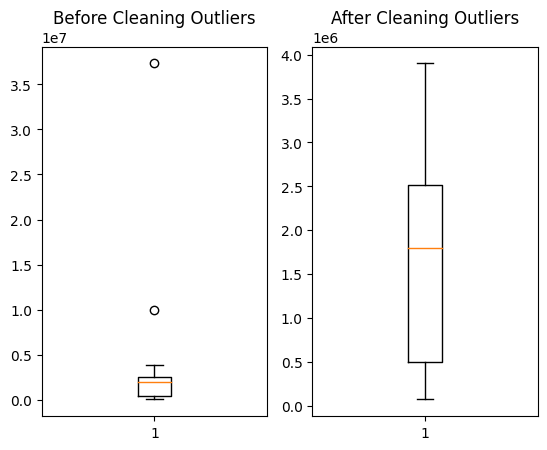

In [ ]:
# Box plot before cleaning outliers
plt.subplot(1, 2, 1)
plt.boxplot(data['total_sales'])
plt.title('Before Cleaning Outliers')

# Box plot after cleaning outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['total_sales'])
plt.title('After Cleaning Outliers')

plt.show()

In [ ]:
new_data = data.drop(['total_sales','film_code', 'cinema_code','ticket_use','date'] , axis=1)

y=data['total_sales']

X_train,X_test,Y_train,Y_test = train_test_split(new_data,y,train_size=0.7,random_state=42)


In [ ]:
new_data.head()

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,26,0,4,4.26,150000.0,610.328638,5,2,5
1086,29,0,2,7.63,80000.0,380.078637,9,3,18
19145,41,0,1,31.30,80000.0,130.990415,7,3,28
23842,5,0,3,1.11,30000.0,450.450450,10,4,23
25210,23,0,3,19.17,120000.0,119.979134,10,4,5


In [ ]:
#Assigning X values based on correlation with y
X = data[['tickets_sold',	'tickets_out',	'show_time',	'occu_perc',	'ticket_price',	'capacity',	'month',	'quarter',	'day']]
Y = data['total_sales']
#new_new_data = new_data.drop(['tickets_out','ticket_price'] , axis=1)





In [ ]:
#Splitting the data into training and testing
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#PREDICTING THE DATA
y_pred = lr.predict(X_test)

In [ ]:
y_pred[0:5]

array([3329507.33746372, 1048095.96784497, 2382836.0503597 ,
       1971964.17843801, 9593572.65362179])

In [ ]:
#Checking r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.9860158643084712

In [ ]:
#Let's check for other metrics too
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))))

MAE: 318052.7186595839
MSE: 118249223548.41406
RMSE: 343873.84830547095


In [ ]:
X_test.shape

(7, 9)

In [ ]:
X_test.head()

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,26,0,4,4.26,150000.0,610.328638,5,2,5
97077,19,0,12,0.31,70000.0,6129.032258,10,4,13
80349,43,0,4,2.54,60000.0,1692.913386,9,3,30
1086,29,0,2,7.63,80000.0,380.078637,9,3,18
37765,143,0,1,20.72,70000.0,690.154440,10,4,24


In [ ]:
#PREDICTING THE DATA
y_pred = lr.predict(X_test.iloc[:1])

In [ ]:
X_test.iloc[0:2]

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,26,0,4,4.26,150000.0,610.328638,5,2,5
97077,19,0,12,0.31,70000.0,6129.032258,10,4,13


In [ ]:
# Create a row in DataFrame
new_data_row = {
    'tickets_sold': 30,
    'tickets_out': 2,
    'show_time': 5,
    'occu_perc': 3.75,
    'ticket_price': 120000.0,
    'capacity': 500.0,
    'month': 8,
    'quarter': 3,
    'day': 10
}

In [ ]:
print(type(new_data_row))

<class 'dict'>


In [ ]:
# Using loc to insert a new row
new_data = new_data.append(new_data_row, ignore_index=True)


<ipython-input-46-e7b283f095bd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_data_row, ignore_index=True)


In [ ]:
# Print the updated DataFrame
print(new_data)

    tickets_sold  tickets_out  show_time  occu_perc   ticket_price  \
0           26.0          0.0        4.0       4.26  150000.000000   
1           29.0          0.0        2.0       7.63   80000.000000   
2           41.0          0.0        1.0      31.30   80000.000000   
3            5.0          0.0        3.0       1.11   30000.000000   
4           23.0          0.0        3.0      19.17  120000.000000   
5           42.0          0.0        3.0       3.50   60000.000000   
6           50.0          0.0        3.0       7.44   40000.000000   
7           12.0          0.0        6.0       1.34   80000.000000   
8          143.0          0.0        1.0      20.72   70000.000000   
9            1.0          0.0        5.0       0.45   70000.000000   
10          44.0          0.0        6.0       3.74   57272.727273   
11          10.0          0.0        1.0       3.72   50000.000000   
12           2.0          0.0        1.0       8.00   80000.000000   
13          12.0    

In [ ]:
# Make sure the features are in the same order as during training
features = [[
    new_data_row['tickets_sold'],
    new_data_row['tickets_out'],
    new_data_row['show_time'],
    new_data_row['occu_perc'],
    new_data_row['ticket_price'],
    new_data_row['capacity'],
    new_data_row['month'],
    new_data_row['quarter'],
    new_data_row['day']
]]

In [ ]:
# Use the trained model to predict total sales
predicted_total_sales = lr.predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Extract the predicted total sales value (assuming it's a single prediction)
predicted_sales_value = predicted_total_sales[0]

In [ ]:
print("Predicted Total Sales:", predicted_sales_value)

Predicted Total Sales: 2937529.1885517845


In [ ]:

# Create the input list 'd' with the defined variables
d = [[150, 30, 120, 75, 20, 200, 9, 3, 20]]


In [ ]:
# Assuming you have already initialized and trained your linear regression model 'lr', you can now predict using 'd'
y_pred = lr.predict(d)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(y_pred)

[14744899.28099342]


In [ ]:
with open("Mylinearregression.model", "wb") as f:
	pickle.dump(lr, f)